In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# Uploading the dataset
from google.colab import files
print("Uploading the dataset - 'laptop_prices.csv' file")
uploaded = files.upload()

Uploading the dataset - 'laptop_prices.csv' file


Saving laptop_prices.csv to laptop_prices.csv


In [ ]:
# Load the dataset
df = pd.read_csv('laptop_prices.csv')

In [ ]:
# Verifying the dataset
print("\nDataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 Rows of the Dataset:")
display(df.head())


Dataset Shape: (1275, 23)
Columns: ['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']

First 5 Rows of the Dataset:


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
# Basic dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_fr

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [ ]:
# Saving a copy of the raw dataset for reference
df.to_csv('laptop_prices_raw.csv', index=False)
print("\nRaw dataset saved as 'laptop_prices_raw.csv' for reference.")


Raw dataset saved as 'laptop_prices_raw.csv' for reference.


In [ ]:
# Loading the raw dataset
df = pd.read_csv('laptop_prices_raw.csv')
print("Raw dataset loaded successfully.")

Raw dataset loaded successfully.


In [ ]:
# Initial data inspection
print("\nInitial Dataset Shape:", df.shape)
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)


Initial Dataset Shape: (1275, 23)

Missing Values Before Cleaning:
Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Data Types:
Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW             

In [ ]:
# No Missing Data

# Numerical columns: Replacing with median
numerical_cols = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
                  'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

# for col in numerical_cols:
#     if df[col].isnull().sum() > 0:
#         median_value = df[col].median()
#         df[col].fillna(median_value, inplace=True)
#         print(f"Replaced missing values in '{col}' with median: {median_value}")

In [ ]:
# Categorical columns: Replacing with mode

categorical_cols = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
                    'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
                    'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']

# for col in categorical_cols:
#     if df[col].isnull().sum() > 0:
#         mode_value = df[col].mode()[0]
#         df[col].fillna(mode_value, inplace=True)
#         print(f"Replaced missing values in '{col}' with mode: {mode_value}")

In [ ]:
# Verifying no missing values remain
# print("\nMissing Values After Imputing:")
# print(df.isnull().sum())

In [ ]:
# Removing duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_rows - df.shape[0]} duplicate rows.")
print("Dataset Shape After Deduplication:", df.shape)


Removed 0 duplicate rows.
Dataset Shape After Deduplication: (1275, 23)


In [ ]:
# Standardize data formats

# Converting Weight to float (remove 'kg' if present)
if df['Weight'].dtype == 'object':
    df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
    print("Converted 'Weight' to float.")

In [ ]:
# Ensuring categorical columns are strings
for col in categorical_cols:
    df[col] = df[col].astype(str)

In [ ]:
# Encoding categorical variables

# One-hot encode categorical columns with reasonable unique values
encode_cols = ['Company', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel',
               'RetinaDisplay', 'CPU_company', 'PrimaryStorageType',
               'SecondaryStorageType', 'GPU_company']
df_encoded = pd.get_dummies(df, columns=encode_cols, prefix=encode_cols, drop_first=True)

In [ ]:
# Dropping high-cardinality columns not useful for modeling
drop_cols = ['Product', 'CPU_model', 'GPU_model']
df_encoded.drop(columns=drop_cols, inplace=True, errors='ignore')
print("\nEncoded categorical variables and dropped high-cardinality columns.")
print("New Columns:", df_encoded.columns.tolist())


Encoded categorical variables and dropped high-cardinality columns.
New Columns: ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'OS_Chrome OS', 'OS_Linux', 'OS_Mac OS X', 'OS_No OS', 'OS_Windows 10', 'OS_Windows 10 S', 'OS_Windows 7', 'OS_macOS', 'Screen_Full HD', 'Screen_Quad HD+', 'Screen_Standard', 'Touchscreen_Yes', 'IPSpanel_Yes', 'RetinaDisplay_Yes', 'CPU_company_Intel', 'CPU_company_Samsung', 'PrimaryStorageType_HDD', 'PrimaryStorageType_Hybrid', 'PrimaryStorageType_SSD', 'SecondaryStorageType_Hybrid'

In [ ]:
# Defining numerical columns, excluding the target variable 'Price_euros'
numerical_cols = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                  'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']  # Removed 'Price_euros'

# Scaling numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print("\nScaled numerical features using StandardScaler.")

# Saving the scaler and training columns for the demo
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(df_encoded.columns.tolist(), 'training_columns.pkl')
print("Scaler saved as 'scaler.pkl'.")
print("Training columns saved as 'training_columns.pkl'.")


Scaled numerical features using StandardScaler.
Scaler saved as 'scaler.pkl'.
Training columns saved as 'training_columns.pkl'.


In [ ]:
# Verifying the processed dataset
print("\nProcessed Dataset Shape:", df_encoded.shape)
print("\nFirst 5 Rows of Processed Dataset:")
display(df_encoded.head())
print("\nData Types After Processing:")
print(df_encoded.dtypes)

# Reload unscaled Price_euros from laptop_prices_raw.csv
df_raw = pd.read_csv('laptop_prices_raw.csv')
df_encoded['Price_euros'] = df_raw['Price_euros']

# Verifying the unscaled Price_euros
print("\nUnscaled Price_euros Summary:")
print(df_encoded['Price_euros'].describe())

# Saving the processed dataset
df_encoded.to_csv('laptop_prices_processed.csv', index=False)
print("\nProcessed dataset saved as 'laptop_prices_processed.csv'.")


Processed Dataset Shape: (1275, 57)

First 5 Rows of Processed Dataset:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,CPU_company_Samsung,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,-1.205746,-0.086499,-1.002380,1339.69,1.338239,1.853934,-0.005918,-0.866236,-0.423449,True,...,False,False,False,True,False,True,False,False,True,False
1,-1.205746,-0.086499,-1.047227,898.94,-0.932863,-0.612830,-0.998674,-0.866236,-0.423449,True,...,False,False,False,False,False,True,False,False,True,False
2,0.403873,-0.086499,-0.269871,575.00,0.040466,0.021481,0.391185,-0.515929,-0.423449,False,...,False,False,False,True,False,True,False,False,True,False
3,0.263906,1.483418,-0.314718,2537.45,1.987125,2.558724,0.788288,0.184684,-0.423449,True,...,False,False,False,True,False,True,False,False,False,False
4,-1.205746,-0.086499,-1.002380,1803.60,1.338239,1.853934,1.582493,-0.515929,-0.423449,True,...,False,False,False,True,False,True,False,False,True,False



Data Types After Processing:
Inches                         float64
Ram                            float64
Weight                         float64
Price_euros                    float64
ScreenW                        float64
ScreenH                        float64
CPU_freq                       float64
PrimaryStorage                 float64
SecondaryStorage               float64
Company_Apple                     bool
Company_Asus                      bool
Company_Chuwi                     bool
Company_Dell                      bool
Company_Fujitsu                   bool
Company_Google                    bool
Company_HP                        bool
Company_Huawei                    bool
Company_LG                        bool
Company_Lenovo                    bool
Company_MSI                       bool
Company_Mediacom                  bool
Company_Microsoft                 bool
Company_Razer                     bool
Company_Samsung                   bool
Company_Toshiba                   

In [ ]:
# Setting plot style for consistency
plt.style.use('seaborn-v0_8')  # Updated to compatible style
sns.set_palette('viridis')

In [ ]:
# Loading the processed dataset
df = pd.read_csv('laptop_prices_processed.csv')
print("Processed dataset loaded successfully.")

Processed dataset loaded successfully.


In [ ]:
# Basic dataset overview
print("\nDataset Shape:", df.shape)
print("\nFirst 5 Rows of Dataset:")
display(df.head())
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nSummary Statistics for Numerical Features:")
display(df.describe())


Dataset Shape: (1275, 57)

First 5 Rows of Dataset:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,CPU_company_Samsung,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,-1.205746,-0.086499,-1.002380,1339.69,1.338239,1.853934,-0.005918,-0.866236,-0.423449,True,...,False,False,False,True,False,True,False,False,True,False
1,-1.205746,-0.086499,-1.047227,898.94,-0.932863,-0.612830,-0.998674,-0.866236,-0.423449,True,...,False,False,False,False,False,True,False,False,True,False
2,0.403873,-0.086499,-0.269871,575.00,0.040466,0.021481,0.391185,-0.515929,-0.423449,False,...,False,False,False,True,False,True,False,False,True,False
3,0.263906,1.483418,-0.314718,2537.45,1.987125,2.558724,0.788288,0.184684,-0.423449,True,...,False,False,False,True,False,True,False,False,False,False
4,-1.205746,-0.086499,-1.002380,1803.60,1.338239,1.853934,1.582493,-0.515929,-0.423449,True,...,False,False,False,True,False,True,False,False,True,False



Data Types:
bool       48
float64     9
Name: count, dtype: int64

Summary Statistics for Numerical Features:


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1.275000e+03,1.275000e+03,1.275000e+03,1275.000000,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03
mean,1.404367e-15,-6.966105e-17,-1.476814e-16,1134.969059,6.687461e-17,-3.483053e-16,-6.687461e-17,3.761697e-17,7.244749e-17
std,1.000392e+00,1.000392e+00,1.000392e+00,700.752504,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00
min,-3.445217e+00,-1.263937e+00,-2.018923e+00,174.000000,-1.082918e+00,-1.077991e+00,-2.785636e+00,-1.194648e+00,-4.234490e-01
25%,-7.158621e-01,-8.714580e-01,-8.080407e-01,609.000000,4.046633e-02,2.148088e-02,-6.015716e-01,-5.159293e-01,-4.234490e-01
50%,4.038731e-01,-8.649936e-02,-7.855642e-04,989.000000,4.046633e-02,2.148088e-02,3.911851e-01,-5.159293e-01,-4.234490e-01
75%,4.038731e-01,-8.649936e-02,4.028420e-01,1496.500000,4.046633e-02,2.148088e-02,7.882877e-01,1.846836e-01,-4.234490e-01
max,2.363410e+00,1.090292e+01,3.975693e+00,6099.000000,3.933784e+00,3.827345e+00,2.575250e+00,4.388361e+00,4.502026e+00


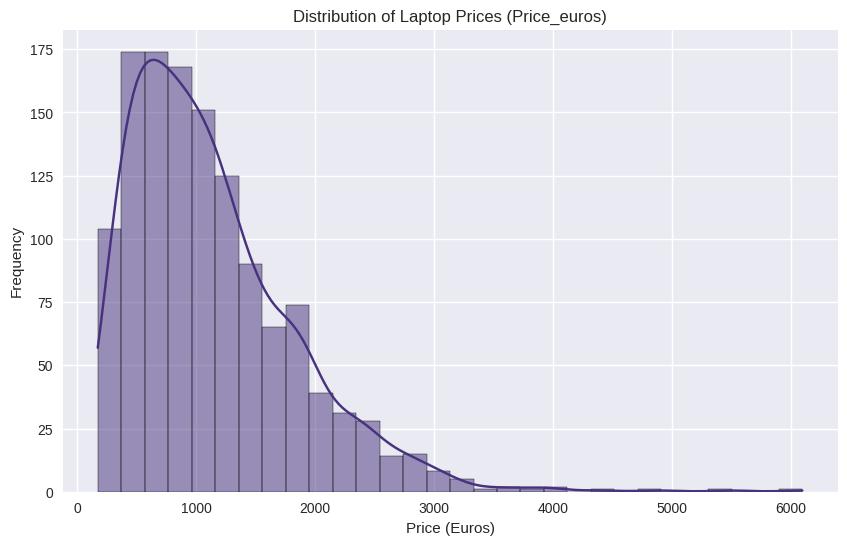

In [ ]:
# Distribution of the target variable (Price_euros)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices (Price_euros)')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()

In [ ]:
# Checking for skewness in Price_euros
price_skew = df['Price_euros'].skew()
print(f"\nSkewness of Price_euros: {price_skew:.2f}")
if price_skew > 1:
    print("Price_euros is right-skewed. We can consider log-transformation in feature engineering.")


Skewness of Price_euros: 1.51
Price_euros is right-skewed. We can consider log-transformation in feature engineering.


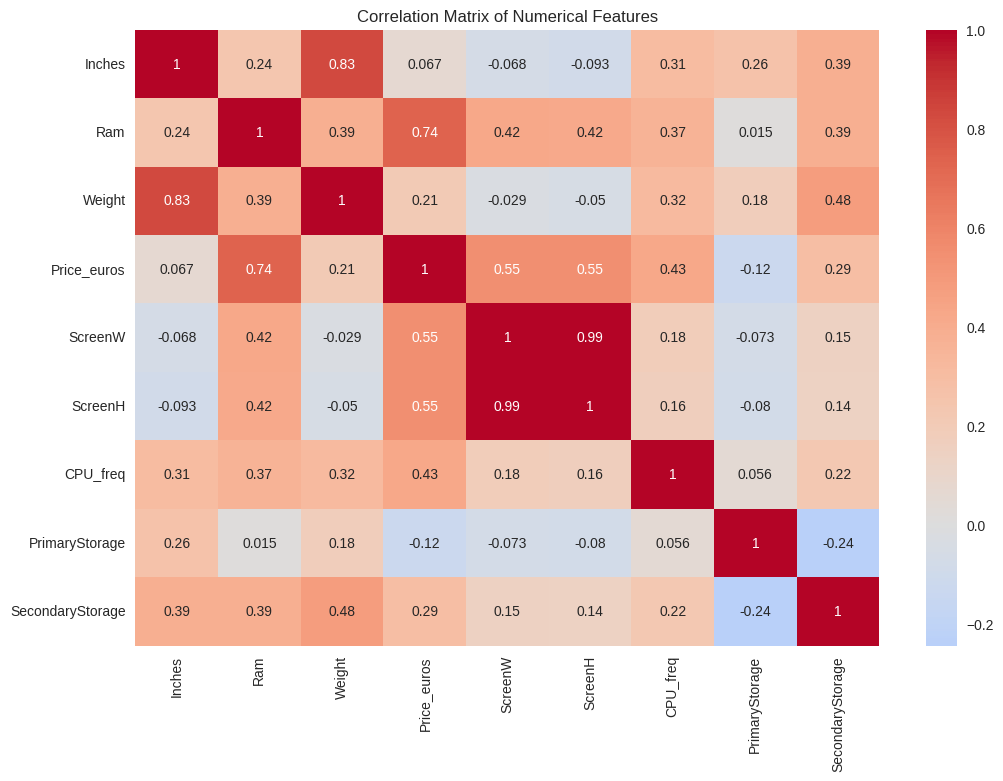

In [ ]:
# Correlation analysis for numerical features
numerical_cols = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
                  'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')
plt.show()

In [ ]:
# Highlighting strong correlations with Price_euros
price_corr = corr_matrix['Price_euros'].sort_values(ascending=False)
print("\nCorrelations with Price_euros:")
print(price_corr)


Correlations with Price_euros:
Price_euros         1.000000
Ram                 0.740287
ScreenW             0.552491
ScreenH             0.548529
CPU_freq            0.428847
SecondaryStorage    0.291207
Weight              0.211883
Inches              0.066608
PrimaryStorage     -0.124775
Name: Price_euros, dtype: float64


Raw dataset loaded for numerical feature interpretation.


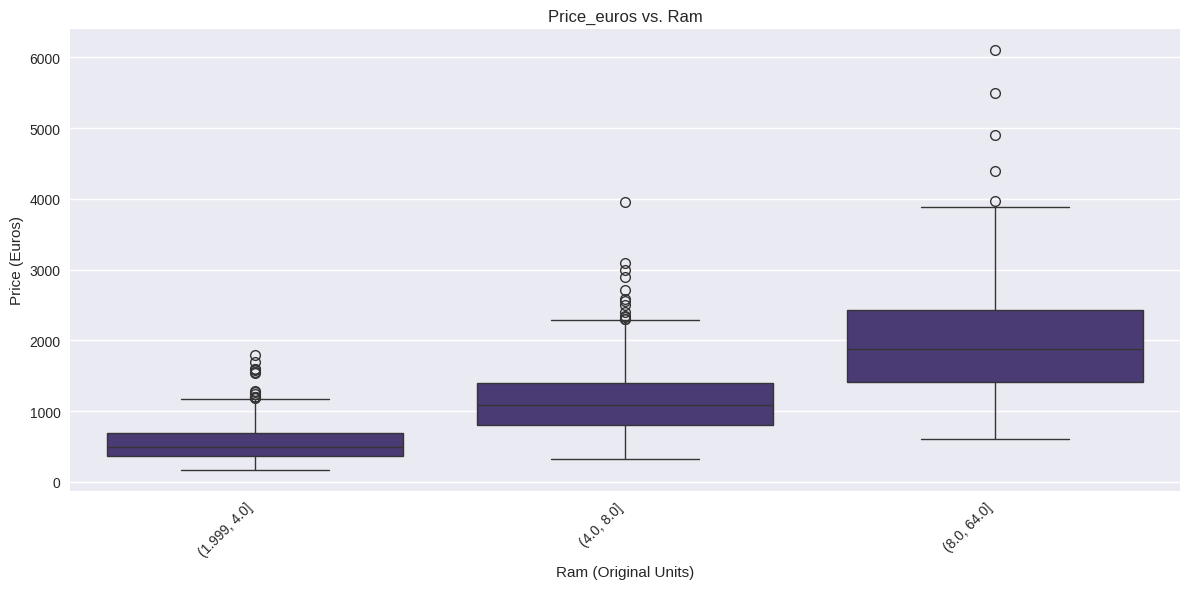

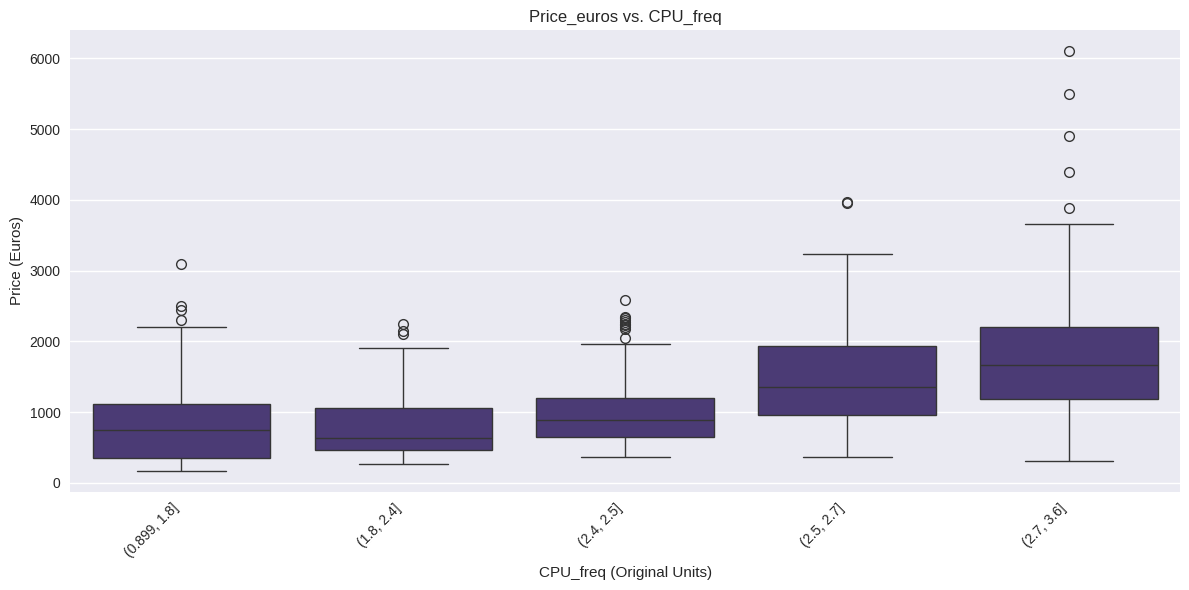

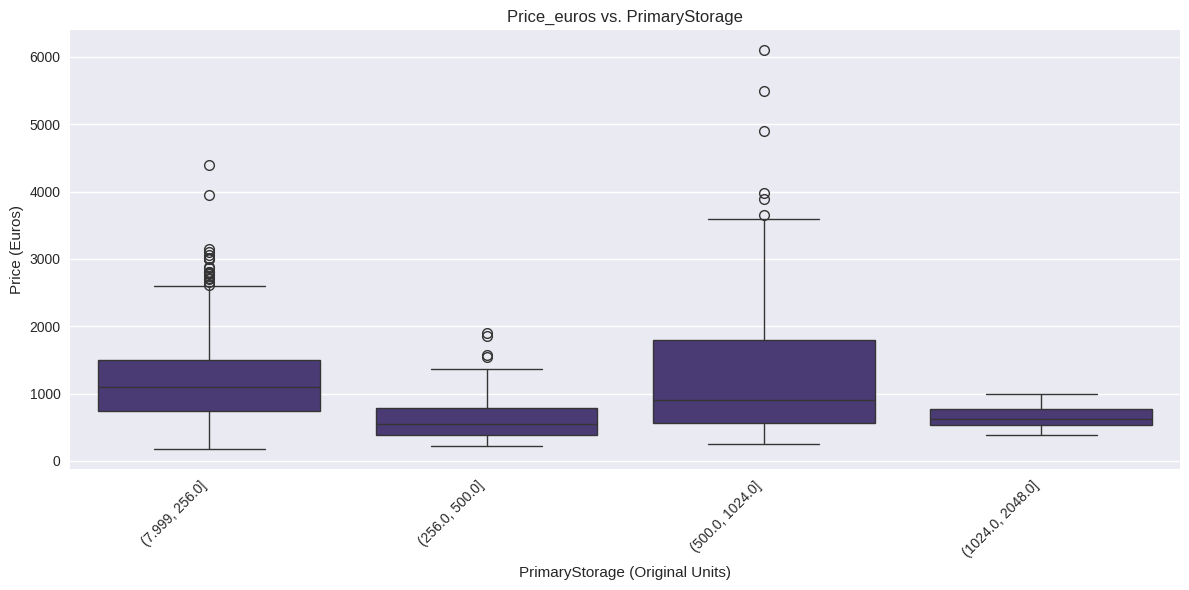

In [ ]:
# Boxplots for key numerical features vs. Price_euros
df_raw = pd.read_csv('laptop_prices_raw.csv')
print("Raw dataset loaded for numerical feature interpretation.")

key_numerical = ['Ram', 'CPU_freq', 'PrimaryStorage']

for col in key_numerical:
    plt.figure(figsize=(12, 6))

    # If raw data is available, mapping scaled values to original for better x-axis labels
    if df_raw is not None:
        # Creating bins of the original (unscaled) values for better grouping
        bins = pd.qcut(df_raw[col], q=5, duplicates='drop')
        # Mapping the scaled values in df to these bins
        df_temp = df.copy()
        df_temp['Binned'] = pd.cut(df_raw[col], bins=bins.cat.categories, labels=bins.cat.categories, include_lowest=True)
        sns.boxplot(x='Binned', y=df['Price_euros'], data=df_temp)
        plt.xticks(rotation=45, ha='right')
    else:
        # If raw data isn't available, using scaled values but improve formatting
        sns.boxplot(x=df[col], y=df['Price_euros'])
        # Limitting the number of x-ticks and format them
        plt.xticks(ticks=plt.xticks()[0][::2], labels=[f"{x:.2f}" for x in plt.xticks()[0][::2]], rotation=45, ha='right')

    plt.title(f'Price_euros vs. {col}')
    plt.xlabel(col + (' (Original Units)' if df_raw is not None else ' (Scaled)'))
    plt.ylabel('Price (Euros)')
    plt.tight_layout()
    plt.savefig(f'boxplot_{col}_price.png')
    plt.show()

Raw dataset loaded for categorical analysis.


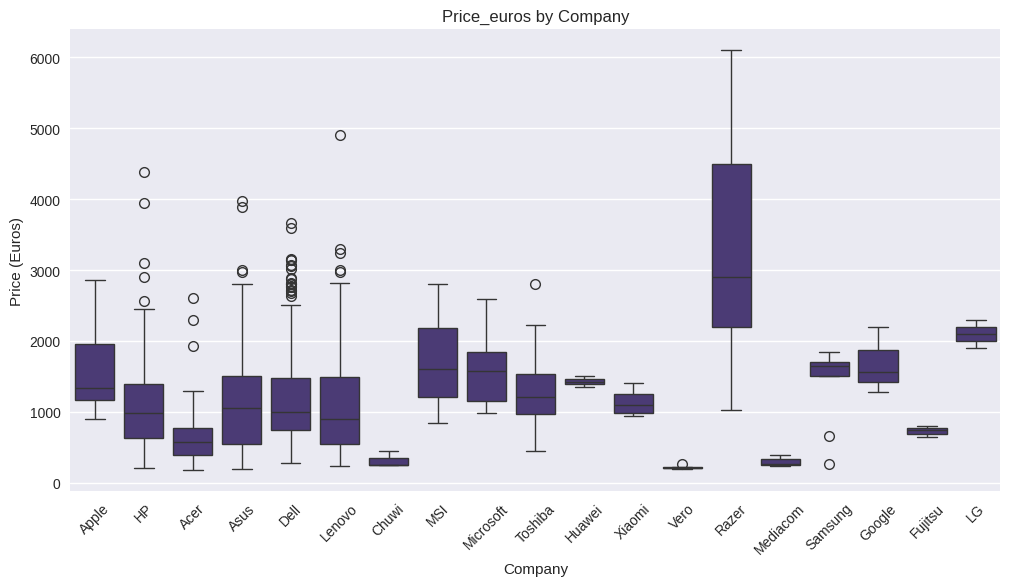


Value Counts for Company:
Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64


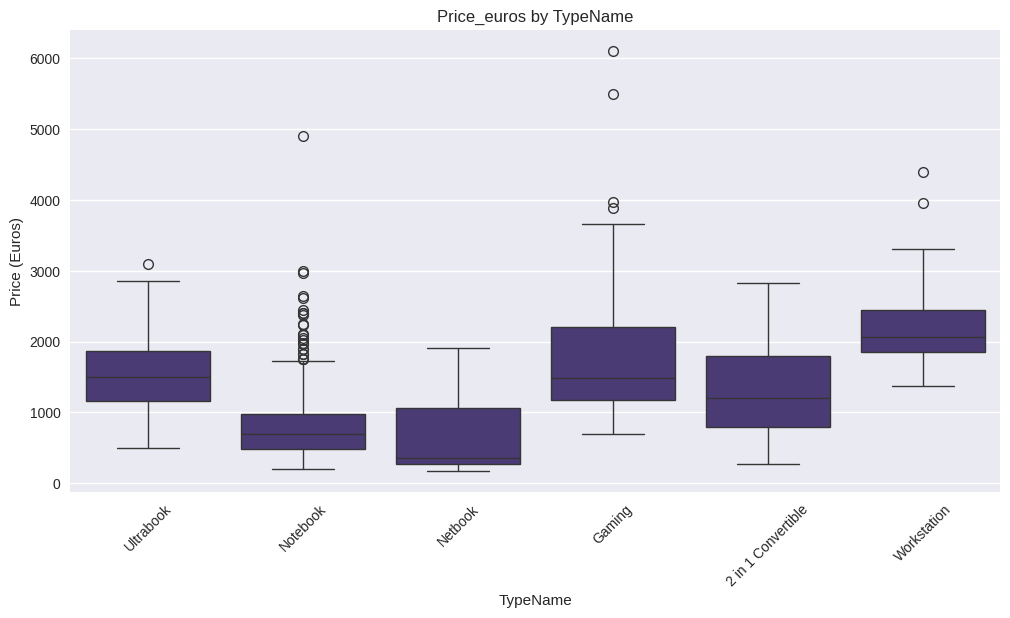


Value Counts for TypeName:
TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64


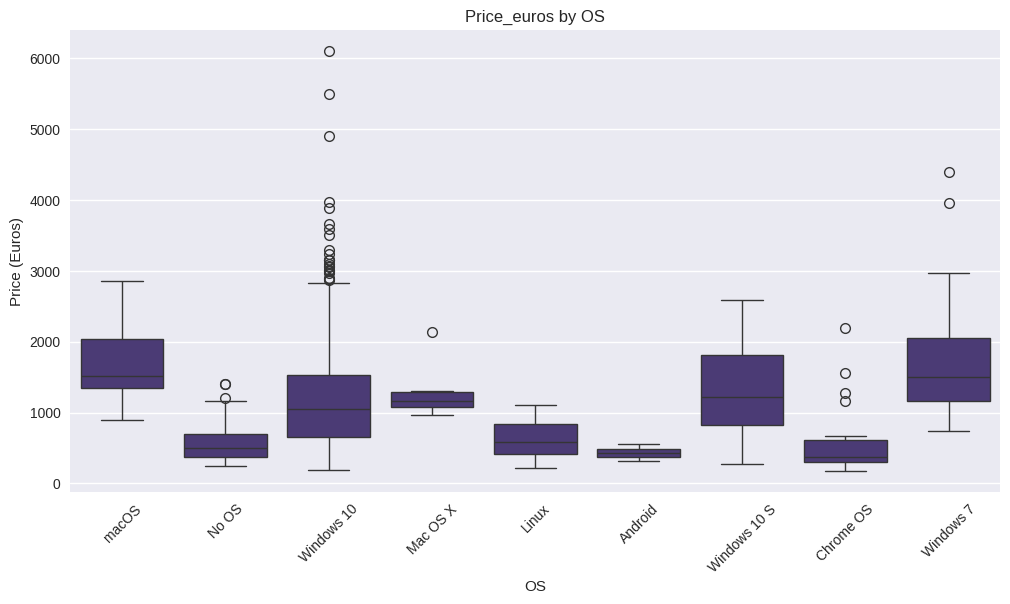


Value Counts for OS:
OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


In [ ]:
# Analyzing categorical features (using original data for interpretability)
try:
    df_raw = pd.read_csv('laptop_prices_raw.csv')
    print("Raw dataset loaded for categorical analysis.")
except FileNotFoundError:
    print("Warning: 'laptop_prices_raw.csv' not found. Skipping categorical analysis.")
    df_raw = None

if df_raw is not None:
    categorical_cols = ['Company', 'TypeName', 'OS']
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df_raw[col], y=df_raw['Price_euros'])
        plt.title(f'Price_euros by {col}')
        plt.xlabel(col)
        plt.ylabel('Price (Euros)')
        plt.xticks(rotation=45)
        plt.savefig(f'boxplot_{col}_price.png')
        plt.show()

        # Printing value counts for context
        print(f"\nValue Counts for {col}:")
        print(df_raw[col].value_counts())

In [ ]:
# Outlier detection using IQR
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price_euros'] < lower_bound) | (df['Price_euros'] > upper_bound)]
print(f"\nNumber of outliers in Price_euros: {len(outliers)}")
if len(outliers) > 0:
    print("Sample of outliers:")
    display(outliers[['Price_euros']].head())


Number of outliers in Price_euros: 28
Sample of outliers:


,Price_euros
17,2858.0
196,6099.0
204,3055.0
238,3890.0
247,2999.0


In [ ]:
# Saving EDA insights
with open('eda_insights.txt', 'w') as f:
    f.write(f"Dataset Shape: {df.shape}\n")
    f.write(f"Skewness of Price_euros: {price_skew:.2f}\n")
    f.write("\nCorrelations with Price_euros:\n")
    f.write(str(price_corr))
    f.write(f"\nNumber of outliers in Price_euros: {len(outliers)}\n")
print("\nEDA insights saved to 'eda_insights.txt'.")


EDA insights saved to 'eda_insights.txt'.


In [ ]:
# Loading the processed dataset
df = pd.read_csv('laptop_prices_processed.csv')
print("Processed dataset loaded successfully.")

Processed dataset loaded successfully.


In [ ]:
# Checking and cleaning Price_euros for valid values
print("\nChecking Price_euros for invalid values:")
print("Non-positive values:", len(df[df['Price_euros'] <= 0]))
if len(df[df['Price_euros'] <= 0]) > 0:
    print("Removing rows with non-positive Price_euros.")
    df = df[df['Price_euros'] > 0]
    print("New Dataset Shape:", df.shape)


Checking Price_euros for invalid values:
Non-positive values: 0


In [ ]:
# Feature engineering

# # Creating interaction term: Ram * CPU_freq
# df['Ram_CPU_freq'] = df['Ram'] * df['CPU_freq']
# print("\nAdded interaction feature: Ram_CPU_freq")

# # Creating total storage feature
# df['TotalStorage'] = df['PrimaryStorage'] + df['SecondaryStorage']
# print("Added feature: TotalStorage")

# # Log-transform Price_euros if skewed (based on EDA skewness > 1)
# price_skew = df['Price_euros'].skew()
# if price_skew > 1:
#     df['Log_Price_euros'] = np.log1p(df['Price_euros'])
#     print(f"Price_euros skewness: {price_skew:.2f}. Added Log_Price_euros.")
# else:
#     df['Log_Price_euros'] = df['Price_euros']
#     print(f"Price_euros skewness: {price_skew:.2f}. No log-transformation needed.")

# # Verifying no NaN in Log_Price_euros
# if df['Log_Price_euros'].isnull().sum() > 0:
#     print("Error: NaN values found in Log_Price_euros after transformation.")
#     raise ValueError("Log_Price_euros contains NaN.")

In [ ]:
# Feature engineering

# ScreenW and ScreenH are almost perfectly correlated. Rather than keeping both, we create a single measure:
# PPI (pixels per inch), which represents screen density.
# Formula: diagonal_pixels / Inches, where diagonal_pixels = sqrt(ScreenW^2 + ScreenH^2).

df['ppi'] = np.sqrt(df['ScreenW']**2 + df['ScreenH']**2) / df['Inches']

# Dropping ScreenW and ScreenH to reduce redundancy.
df.drop(['ScreenW', 'ScreenH'], axis=1, inplace=True)
print("Created 'ppi' from ScreenW and ScreenH; dropped the original columns.")


# Combining PrimaryStorage and SecondaryStorage into a single feature TotalStorage.
df['TotalStorage'] = df['PrimaryStorage'] + df['SecondaryStorage']
print("Created 'TotalStorage' as the sum of PrimaryStorage and SecondaryStorage.")

# Creating 'Ram_CPU_freq' which is the product of Ram and CPU_freq.
df['Ram_CPU_freq'] = df['Ram'] * df['CPU_freq']
print("Created interaction feature 'Ram_CPU_freq' (Ram multiplied by CPU_freq).")

# Checking the skewness of Price_euros. If skewness is greater than 1, we apply a log1p transformation to reduce the impact of extreme values.
price_skew = df['Price_euros'].skew()
if price_skew > 1:
    df['Log_Price_euros'] = np.log1p(df['Price_euros'])
    print(f"Price_euros is right-skewed (skew = {price_skew:.2f}). Applied log1p transform to create 'Log_Price_euros'.")
else:
    df['Log_Price_euros'] = df['Price_euros']
    print(f"Price_euros skewness = {price_skew:.2f}. Log-transformation not required; copying raw prices to 'Log_Price_euros'.")

# Validating that the log transformation did not introduce any NaN values.
if df['Log_Price_euros'].isnull().sum() > 0:
    raise ValueError("Log_Price_euros contains NaN values after transformation.")
else:
    print("No NaN values found in 'Log_Price_euros'.")

# Creating 'Price_per_GB', which measures the price per GB of RAM.
df['Price_per_GB'] = df['Price_euros'] / df['Ram']
print("Created additional feature 'Price_per_GB' (Price_euros divided by Ram).")


# Creating another interaction feature: Storage_Weight.
df['Storage_Weight'] = df['TotalStorage'] * df['Weight']
print("Created interaction feature 'Storage_Weight' (TotalStorage multiplied by Weight).")

# List of new features created for verification.
new_features = ['ppi', 'TotalStorage', 'Ram_CPU_freq', 'Log_Price_euros', 'Price_per_GB', 'Storage_Weight']
print("\nSummary Statistics for New Features:")
print(df[new_features].describe())

# Confirmimg that no NaN values have been created in the new features.
if df[new_features].isnull().any().any():
    print("Error: Some of the newly engineered features contain NaN values.")
else:
    print("Feature engineering completed successfully. No NaN values in new features.")

Created 'ppi' from ScreenW and ScreenH; dropped the original columns.
Created 'TotalStorage' as the sum of PrimaryStorage and SecondaryStorage.
Created interaction feature 'Ram_CPU_freq' (Ram multiplied by CPU_freq).
Price_euros is right-skewed (skew = 1.51). Applied log1p transform to create 'Log_Price_euros'.
No NaN values found in 'Log_Price_euros'.
Created additional feature 'Price_per_GB' (Price_euros divided by Ram).
Created interaction feature 'Storage_Weight' (TotalStorage multiplied by Weight).

Summary Statistics for New Features:
               ppi  TotalStorage  Ram_CPU_freq  Log_Price_euros  Price_per_GB  \
count  1275.000000  1.275000e+03   1275.000000      1275.000000   1275.000000   
mean      0.647044  5.851528e-17      0.366254         6.852920  -6561.746926   
std       2.538653  1.229969e+00      0.940969         0.618913   7873.246410   
min      -6.984150 -1.618097e+00     -3.248659         5.164786 -45658.138716   
25%      -0.058299 -9.393782e-01     -0.068186  

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,CPU_freq,PrimaryStorage,SecondaryStorage,ppi,TotalStorage,Ram_CPU_freq,Log_Price_euros,Price_per_GB,Storage_Weight
count,1.275000e+03,1.275000e+03,1.275000e+03,1275.000000,1.275000e+03,1.275000e+03,1.275000e+03,1275.000000,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000
mean,1.404367e-15,-6.966105e-17,-1.476814e-16,1134.969059,-6.687461e-17,3.761697e-17,7.244749e-17,0.647044,5.851528e-17,0.366254,6.852920,-6561.746926,0.656929
std,1.000392e+00,1.000392e+00,1.000392e+00,700.752504,1.000392e+00,1.000392e+00,1.000392e+00,2.538653,1.229969e+00,0.940969,0.618913,7873.246410,1.275735
min,-3.445217e+00,-1.263937e+00,-2.018923e+00,174.000000,-2.785636e+00,-1.194648e+00,-4.234490e-01,-6.984150,-1.618097e+00,-3.248659,5.164786,-45658.138716,-2.189958
25%,-7.158621e-01,-8.714580e-01,-8.080407e-01,609.000000,-6.015716e-01,-5.159293e-01,-4.234490e-01,-0.058299,-9.393782e-01,-0.068186,6.413459,-12659.052487,-0.003115
50%,4.038731e-01,-8.649936e-02,-7.855642e-04,989.000000,3.911851e-01,-5.159293e-01,-4.234490e-01,0.113437,-2.716066e-01,0.000512,6.897705,-1367.513867,0.300012
75%,4.038731e-01,-8.649936e-02,4.028420e-01,1496.500000,7.882877e-01,1.846836e-01,-4.234490e-01,0.113437,1.162460e+00,0.689267,7.311552,-394.740761,1.039914
max,2.363410e+00,1.090292e+01,3.975693e+00,6099.000000,2.575250e+00,4.388361e+00,4.502026e+00,13.589572,4.686709e+00,8.594639,8.716044,3291.530447,12.895251


In [ ]:
df.head()

,Inches,Ram,Weight,Price_euros,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,Company_Asus,Company_Chuwi,...,SecondaryStorageType_SSD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia,ppi,TotalStorage,Ram_CPU_freq,Log_Price_euros,Price_per_GB,Storage_Weight
0,-1.205746,-0.086499,-1.002380,1339.69,-0.005918,-0.866236,-0.423449,True,False,False,...,False,False,True,False,-1.896313,-1.289685,0.000512,7.200940,-15487.859385,1.292754
1,-1.205746,-0.086499,-1.047227,898.94,-0.998674,-0.866236,-0.423449,True,False,False,...,False,False,True,False,-0.925693,-1.289685,0.086385,6.802328,-10392.446249,1.350593
2,0.403873,-0.086499,-0.269871,575.00,0.391185,-0.515929,-0.423449,False,False,False,...,False,False,True,False,0.113437,-0.939378,-0.033837,6.356108,-6647.447653,0.253511
3,0.263906,1.483418,-0.314718,2537.45,0.788288,0.184684,-0.423449,True,False,False,...,False,False,False,False,12.275996,-0.238765,1.169360,7.839309,1710.542891,0.075144
4,-1.205746,-0.086499,-1.002380,1803.60,1.582493,-0.515929,-0.423449,True,False,False,...,False,False,True,False,-1.896313,-0.939378,-0.136885,7.498094,-20851.020152,0.941614


In [ ]:
# Defining the list of new numerical features.
new_numerical_cols = ["Ram_CPU_freq",
    "TotalStorage",
    "ppi",
    "Price_per_GB",
    "Storage_Weight"]

# Instantiating a StandardScaler for these features.
scaler_new = StandardScaler()

# Fitting the scaler to the new features and transform them.
df[new_numerical_cols] = scaler_new.fit_transform(df[new_numerical_cols])
print("\nScaled new features: " + ", ".join(new_numerical_cols))

# Saving the scaler for these new features for consistency in deployment.
joblib.dump(scaler_new, "scaler_new_features.pkl")
print("Scaler for new features saved as 'scaler_new_features.pkl'.")


Scaled new features: Ram_CPU_freq, TotalStorage, ppi, Price_per_GB, Storage_Weight
Scaler for new features saved as 'scaler_new_features.pkl'.


In [ ]:
# Feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

# Separating features and target
X = df.drop(['Price_euros', 'Log_Price_euros'], axis=1)
y = df['Log_Price_euros'] if 'Log_Price_euros' in df.columns and price_skew > 1 else df['Price_euros']

# Selecting top 20 features based on f_regression
selector = SelectKBest(score_func=f_regression, k=20)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("\nTop 20 Selected Features:")
print(selected_features)

# Creating dataset with selected features
df_selected = df[selected_features + ['Price_euros', 'Log_Price_euros']]
print("\nDataset Shape After Feature Selection:", df_selected.shape)


Top 20 Selected Features:
['Ram', 'CPU_freq', 'SecondaryStorage', 'TypeName_Gaming', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'OS_No OS', 'Screen_Full HD', 'Screen_Standard', 'Touchscreen_Yes', 'IPSpanel_Yes', 'CPU_company_Intel', 'PrimaryStorageType_HDD', 'PrimaryStorageType_SSD', 'SecondaryStorageType_No', 'GPU_company_Intel', 'GPU_company_Nvidia', 'Price_per_GB', 'Storage_Weight']

Dataset Shape After Feature Selection: (1275, 22)


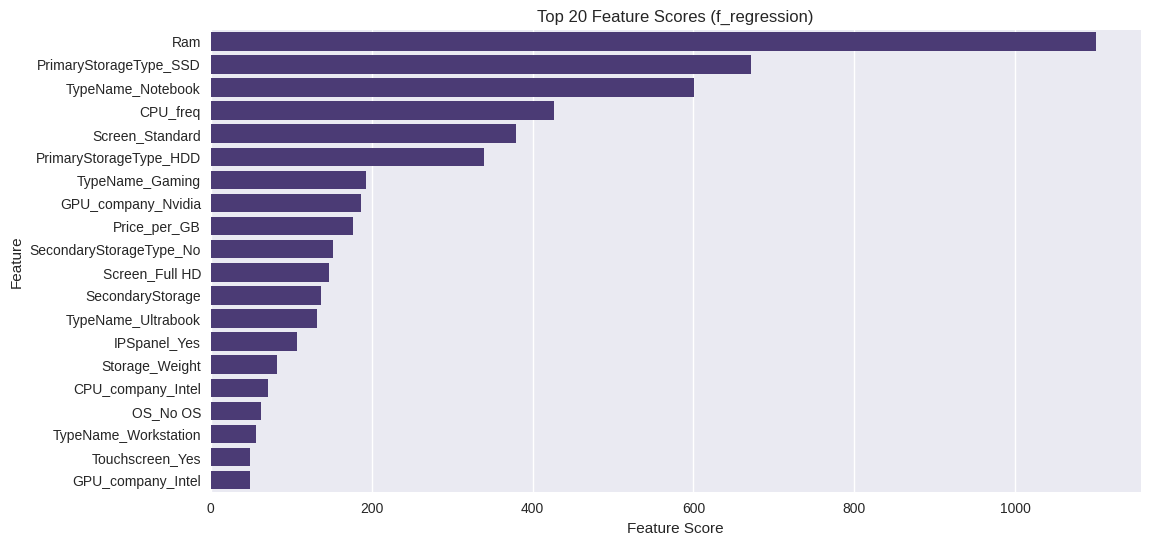

In [ ]:
# Visualization of feature importance
scores = pd.Series(selector.scores_, index=X.columns)
scores = scores.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=scores.values, y=scores.index)
plt.title('Top 20 Feature Scores (f_regression)')
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.savefig('feature_scores.png')
plt.show()

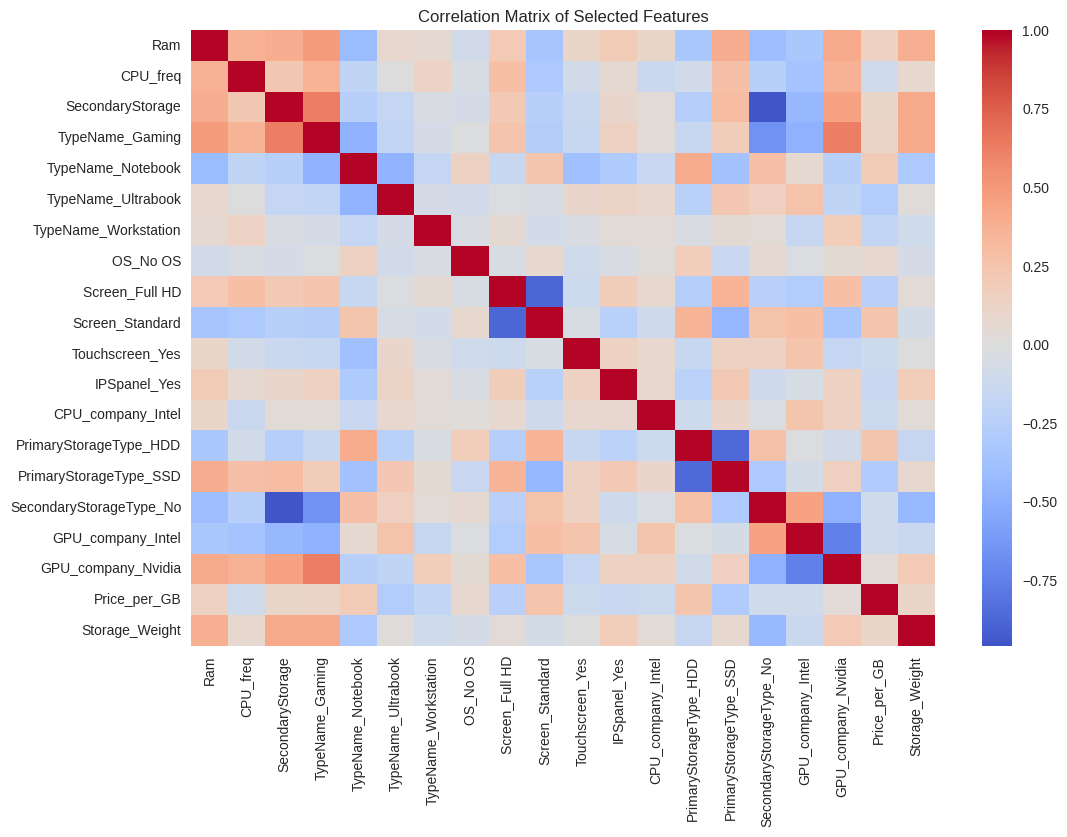

In [ ]:
# Checking for correlation of selected features to avoid multicollinearity
plt.figure(figsize=(12, 8))
corr_matrix = df_selected[selected_features].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.savefig('selected_features_correlation.png')
plt.show()

In [ ]:
# Dropping highly correlated features (|corr| > 0.8)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
if high_corr_pairs:
    print("\nHigh Correlation Pairs (|corr| > 0.8):")
    for pair in high_corr_pairs:
        print(pair)

    # Dropping one feature from each pair (keeping the first)
    to_drop = [pair[1] for pair in high_corr_pairs]
    df_selected = df_selected.drop(columns=to_drop, errors='ignore')
    print(f"Dropped features to reduce multicollinearity: {to_drop}")
else:
    print("\nNo high correlation pairs found (|corr| > 0.8).")


High Correlation Pairs (|corr| > 0.8):
('SecondaryStorage', 'SecondaryStorageType_No')
('Screen_Full HD', 'Screen_Standard')
('PrimaryStorageType_HDD', 'PrimaryStorageType_SSD')
Dropped features to reduce multicollinearity: ['SecondaryStorageType_No', 'Screen_Standard', 'PrimaryStorageType_SSD']


In [ ]:
# Verifying the final dataset
print("\nFinal Dataset Shape:", df_selected.shape)
print("\nFirst 5 Rows of Final Dataset:")
display(df_selected.head())
print("\nData Types:")
print(df_selected.dtypes)

# Saving the engineered dataset
df_selected.to_csv('laptop_prices_engineered.csv', index=False)
print("\nEngineered dataset saved as 'laptop_prices_engineered.csv'.")


Final Dataset Shape: (1275, 19)

First 5 Rows of Final Dataset:


,Ram,CPU_freq,SecondaryStorage,TypeName_Gaming,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_No OS,Screen_Full HD,Touchscreen_Yes,IPSpanel_Yes,CPU_company_Intel,PrimaryStorageType_HDD,GPU_company_Intel,GPU_company_Nvidia,Price_per_GB,Storage_Weight,Price_euros,Log_Price_euros
0,-0.086499,-0.005918,-0.423449,False,False,True,False,False,False,False,True,True,False,True,False,-1.134172,0.498595,1339.69,7.200940
1,-0.086499,-0.998674,-0.423449,False,False,True,False,False,False,False,False,True,False,True,False,-0.486737,0.543950,898.94,6.802328
2,-0.086499,0.391185,-0.423449,False,True,False,False,True,True,False,False,True,False,True,False,-0.010889,-0.316348,575.00,6.356108
3,1.483418,0.788288,-0.423449,False,False,True,False,False,False,False,True,True,False,False,False,1.051096,-0.456218,2537.45,7.839309
4,-0.086499,1.582493,-0.423449,False,False,True,False,False,False,False,True,True,False,True,False,-1.815627,0.223241,1803.60,7.498094



Data Types:
Ram                       float64
CPU_freq                  float64
SecondaryStorage          float64
TypeName_Gaming              bool
TypeName_Notebook            bool
TypeName_Ultrabook           bool
TypeName_Workstation         bool
OS_No OS                     bool
Screen_Full HD               bool
Touchscreen_Yes              bool
IPSpanel_Yes                 bool
CPU_company_Intel            bool
PrimaryStorageType_HDD       bool
GPU_company_Intel            bool
GPU_company_Nvidia           bool
Price_per_GB              float64
Storage_Weight            float64
Price_euros               float64
Log_Price_euros           float64
dtype: object

Engineered dataset saved as 'laptop_prices_engineered.csv'.


In [ ]:
# Loading the engineered dataset
df = pd.read_csv('laptop_prices_engineered.csv')
print("Engineered dataset loaded successfully.")

Engineered dataset loaded successfully.


In [ ]:
# Preparing features and target

# Using Log_Price_euros if it exists and skewness was high, else Price_euros
if 'Log_Price_euros' in df.columns and df['Price_euros'].skew() > 1:
    target = 'Log_Price_euros'
    print("Using Log_Price_euros as target due to skewness.")
else:
    target = 'Price_euros'
    print("Using Price_euros as target.")

X = df.drop(['Price_euros', 'Log_Price_euros'], axis=1, errors='ignore')
y = df[target]

Using Log_Price_euros as target due to skewness.


In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Train Set Shape: (1020, 17)
Test Set Shape: (255, 17)


In [ ]:
# Defining models
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

In [ ]:
# Training and evaluating models using cross-validation
cv_results = {}
for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    cv_results[name] = {
        'Mean RMSE': cv_rmse.mean(),
        'Std RMSE': cv_rmse.std()
    }
    print(f"\n{name}:")
    print(f"Cross-Validation RMSE Scores: {cv_rmse}")
    print(f"Mean CV RMSE: {cv_results[name]['Mean RMSE']:.2f}")
    print(f"Std CV RMSE: {cv_results[name]['Std RMSE']:.2f}")


Linear Regression:
Cross-Validation RMSE Scores: [0.28716211 0.26966677 0.3416498  0.29089    0.3176731 ]
Mean CV RMSE: 0.30
Std CV RMSE: 0.03

Random Forest:
Cross-Validation RMSE Scores: [0.07584536 0.0326687  0.06642169 0.0725971  0.04963261]
Mean CV RMSE: 0.06
Std CV RMSE: 0.02

XGBoost:
Cross-Validation RMSE Scores: [0.05415297 0.03702728 0.06581201 0.05001361 0.05136892]
Mean CV RMSE: 0.05
Std CV RMSE: 0.01


In [ ]:
# Training models on full training data and evaluate on test set
test_results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # If using Log_Price_euros, transform predictions back to original scale
    if target == 'Log_Price_euros':
        y_pred = np.expm1(y_pred)  # Inverse of log1p
        y_test_eval = np.expm1(y_test)
    else:
        y_test_eval = y_test

    # Calculating metrics
    rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred))
    mae = mean_absolute_error(y_test_eval, y_pred)
    r2 = r2_score(y_test_eval, y_pred)

    test_results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"\n{name} Test Performance:")
    print(f"RMSE: {rmse:.2f} Euros")
    print(f"MAE: {mae:.2f} Euros")
    print(f"R2: {r2:.2f}")


Linear Regression Test Performance:
RMSE: 371.74 Euros
MAE: 252.43 Euros
R2: 0.72

Random Forest Test Performance:
RMSE: 176.21 Euros
MAE: 27.90 Euros
R2: 0.94

XGBoost Test Performance:
RMSE: 114.79 Euros
MAE: 28.40 Euros
R2: 0.97


In [ ]:
# Selecting the best model based on test RMSE
best_model_name = min(test_results, key=lambda x: test_results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Test RMSE: {test_results[best_model_name]['RMSE']:.2f} Euros")


Best Model: XGBoost
Test RMSE: 114.79 Euros


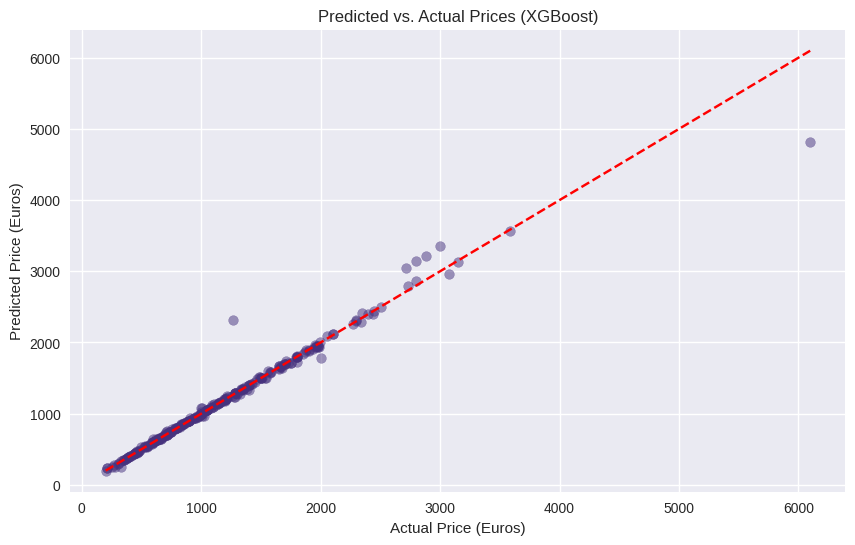

In [ ]:
# Visualizing predictions vs. actuals for the best model
y_pred = best_model.predict(X_test)
if target == 'Log_Price_euros':
    y_pred = np.expm1(y_pred)
    y_test_plot = np.expm1(y_test)
else:
    y_test_plot = y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_test_plot, y_pred, alpha=0.5)
plt.plot([y_test_plot.min(), y_test_plot.max()], [y_test_plot.min(), y_test_plot.max()], 'r--')
plt.title(f'Predicted vs. Actual Prices ({best_model_name})')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.savefig('predicted_vs_actual.png')
plt.show()

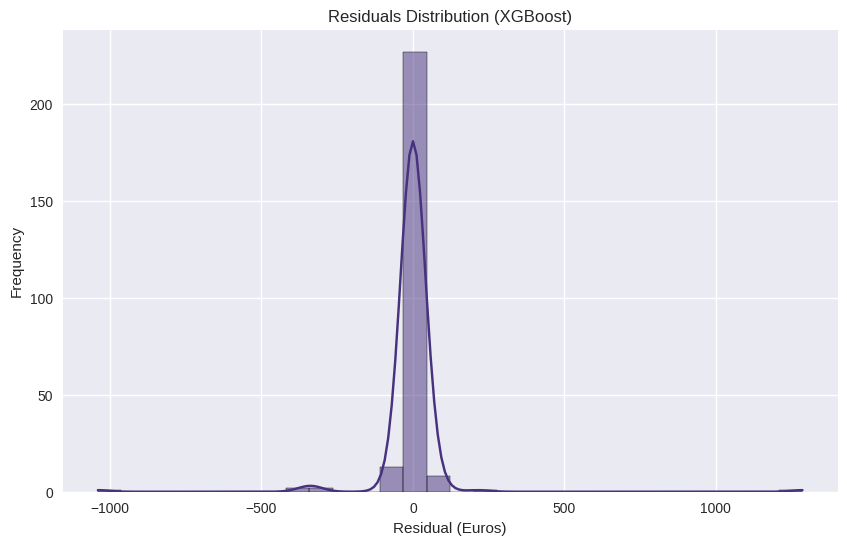

In [ ]:
# Visualizing residuals
residuals = y_test_plot - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title(f'Residuals Distribution ({best_model_name})')
plt.xlabel('Residual (Euros)')
plt.ylabel('Frequency')
plt.savefig('residuals_distribution.png')
plt.show()

In [ ]:
# Saving the best model
joblib.dump(best_model, 'best_laptop_price_model.pkl')
print("\nBest model saved as 'best_laptop_price_model.pkl'.")

# Saving performance metrics
with open('model_performance.txt', 'w') as f:
    for name, metrics in test_results.items():
        f.write(f"{name}:\n")
        f.write(f"RMSE: {metrics['RMSE']:.2f} Euros\n")
        f.write(f"MAE: {metrics['MAE']:.2f} Euros\n")
        f.write(f"R2: {metrics['R2']:.2f}\n\n")
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Test RMSE: {test_results[best_model_name]['RMSE']:.2f} Euros\n")
print("Model performance metrics saved to 'model_performance.txt'.")


Best model saved as 'best_laptop_price_model.pkl'.
Model performance metrics saved to 'model_performance.txt'.


In [ ]:
# Loading the engineered dataset
df = pd.read_csv('laptop_prices_engineered.csv')
print("Engineered dataset loaded successfully.")

Engineered dataset loaded successfully.


In [ ]:
# Preparing features and target

# Use Log_Price_euros if it exists and skewness was high, else Price_euros
if 'Log_Price_euros' in df.columns and df['Price_euros'].skew() > 1:
    target = 'Log_Price_euros'
    print("Using Log_Price_euros as target due to skewness.")
else:
    target = 'Price_euros'
    print("Using Price_euros as target.")

X = df.drop(['Price_euros', 'Log_Price_euros'], axis=1, errors='ignore')
y = df[target]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Using Log_Price_euros as target due to skewness.

Train Set Shape: (1020, 17)
Test Set Shape: (255, 17)


In [ ]:
# Defining the best model type
best_model_type = 'XGBoost'
print(f"\nTuning {best_model_type} model.")

# Defining hyperparameter grid for XGBoost
model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}


Tuning XGBoost model.


In [ ]:
# Performing grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("\nBest Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluating tuned model on training set (cross-validation)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"\nTuned {best_model_type} Cross-Validation:")
print(f"RMSE Scores: {cv_rmse}")
print(f"Mean CV RMSE: {cv_rmse.mean():.2f}")
print(f"Std CV RMSE: {cv_rmse.std():.2f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

Tuned XGBoost Cross-Validation:
RMSE Scores: [0.05283972 0.03062896 0.06399974 0.04547798 0.04173299]
Mean CV RMSE: 0.05
Std CV RMSE: 0.01


In [ ]:
# Evaluating tuned model on test set
y_pred = best_model.predict(X_test)
if target == 'Log_Price_euros':
    y_pred = np.expm1(y_pred)  # Inverse of log1p
    y_test_eval = np.expm1(y_test)
else:
    y_test_eval = y_test

In [ ]:
# Calculating metrics
rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred))
mae = mean_absolute_error(y_test_eval, y_pred)
r2 = r2_score(y_test_eval, y_pred)
print(f"\nTuned {best_model_type} Test Performance:")
print(f"RMSE: {rmse:.2f} Euros")
print(f"MAE: {mae:.2f} Euros")
print(f"R2: {r2:.2f}")


Tuned XGBoost Test Performance:
RMSE: 107.12 Euros
MAE: 28.74 Euros
R2: 0.98


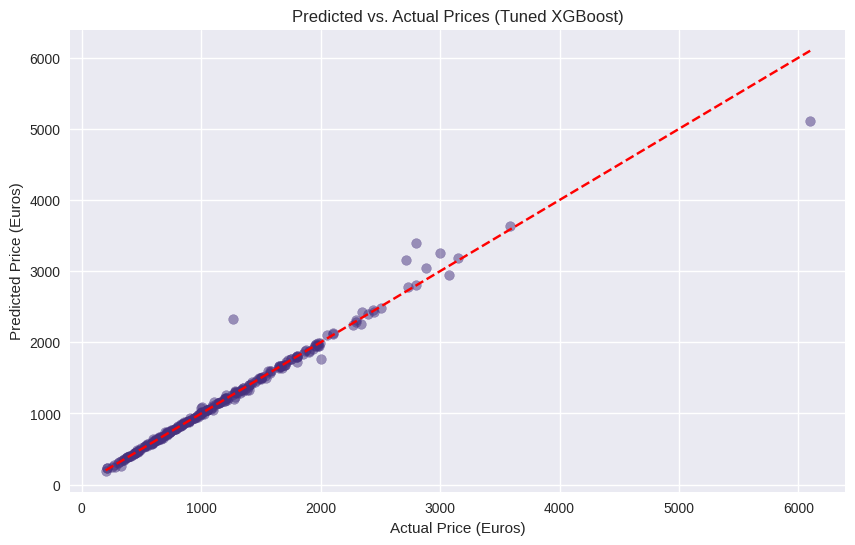

In [ ]:
# Visualizing predictions vs. actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_eval, y_pred, alpha=0.5)
plt.plot([y_test_eval.min(), y_test_eval.max()], [y_test_eval.min(), y_test_eval.max()], 'r--')
plt.title(f'Predicted vs. Actual Prices (Tuned {best_model_type})')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.savefig('tuned_predicted_vs_actual.png')
plt.show()

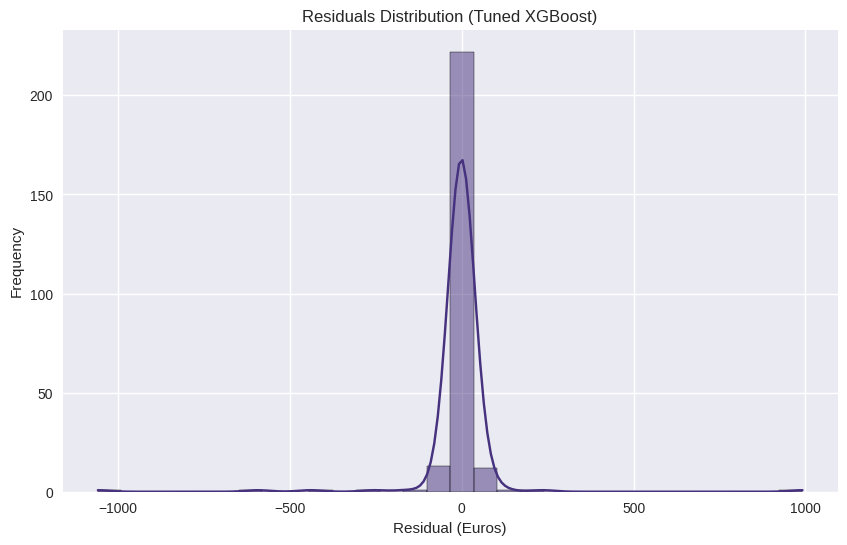

In [ ]:
# Visualizing residuals
residuals = y_test_eval - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title(f'Residuals Distribution (Tuned {best_model_type})')
plt.xlabel('Residual (Euros)')
plt.ylabel('Frequency')
plt.savefig('tuned_residuals_distribution.png')
plt.show()

In [ ]:
#Anomaly watch‑list (over/under‑priced products)

# Combining specs, actuals, predictions, and residuals
results = X_test.copy()
results["Actual_Price"] = y_test_eval.values
results["Predicted_Price"] = y_pred
results["Residual"] = results["Actual_Price"] - results["Predicted_Price"]

# Identifying top‑N anomalies
N = 5
overpriced = results.sort_values("Residual", ascending=False).head(N)      # large +ve residuals
underpriced = results.sort_values("Residual", ascending=True).head(N)       # large –ve residuals
watch_list = pd.concat([overpriced, underpriced]).reset_index(drop=True)

# Tagging direction for readability
watch_list["Flag"] = np.where(watch_list["Residual"] > 0, "Over‑priced", "Under‑priced")

# Displaying results
display_cols = ["Flag", "Residual", "Actual_Price", "Predicted_Price"] + list(X_test.columns)
watch_list[display_cols].style.format({"Residual":"{:.0f}€",
                                       "Actual_Price":"{:.0f}€",
                                       "Predicted_Price":"{:.0f}€"})

,Flag,Residual,Actual_Price,Predicted_Price,Ram,CPU_freq,SecondaryStorage,TypeName_Gaming,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_No OS,Screen_Full HD,Touchscreen_Yes,IPSpanel_Yes,CPU_company_Intel,PrimaryStorageType_HDD,GPU_company_Intel,GPU_company_Nvidia,Price_per_GB,Storage_Weight
0,Over‑priced,991€,6099€,5108€,4.623253,1.185390,-0.423449,True,False,False,False,False,False,True,False,True,False,False,True,1.001371,1.460077
1,Over‑priced,236€,1999€,1763€,0.698459,0.986839,2.039288,True,False,False,False,False,True,False,False,True,False,False,True,1.197404,1.823296
2,Over‑priced,126€,3073€,2947€,4.623253,0.986839,2.039288,True,False,False,False,False,True,False,True,True,False,False,True,0.918203,5.688362
3,Over‑priced,76€,330€,254€,-1.263937,-1.395777,-0.423449,False,True,False,False,False,False,False,False,True,False,True,False,0.800576,0.140957
4,Over‑priced,75€,2338€,2263€,1.483418,0.788288,-0.423449,False,False,False,True,False,True,False,True,True,False,False,True,1.034012,-0.551383
5,Under‑priced,-1059€,1269€,2328€,3.053335,0.589736,2.039288,True,False,False,False,False,True,True,True,True,False,False,True,0.886559,3.573365
6,Under‑priced,-593€,2799€,3392€,4.623253,0.788288,-0.423449,True,False,False,False,False,True,False,True,True,False,False,True,0.910676,-1.007615
7,Under‑priced,-440€,2712€,3152€,-0.086499,0.986839,-0.423449,False,False,False,True,False,False,True,False,True,False,False,True,-3.150011,-0.228252
8,Under‑priced,-256€,2999€,3255€,1.483418,1.185390,-0.423449,True,False,False,False,False,True,False,False,True,False,False,True,1.090630,-2.232441
9,Under‑priced,-161€,2885€,3045€,1.483418,1.185390,-0.423449,False,False,False,True,False,True,False,False,True,False,False,True,1.080853,-2.034225


In [ ]:
# Reloading the raw data
df_raw = pd.read_csv('laptop_prices.csv')

# Original split
train_idx, test_idx = train_test_split(
    df_raw.index,
    test_size=0.2,
    random_state=42,
)

# Extracting the metadata for the test set
meta = df_raw.loc[test_idx, ['Company', 'Product']]

# Joining meta onto our results DataFrame
results = X_test.copy()
results['Actual_Price'] = y_test_eval.values
results['Predicted_Price'] = y_pred
results['Residual'] = results['Actual_Price'] - results['Predicted_Price']

results = results.join(meta)

# Rebuilding and displaying our watch_list with Company & Product now present
N = 5
overpriced = results.sort_values('Residual', ascending=False).head(N)
underpriced = results.sort_values('Residual', ascending=True).head(N)
watch_list = pd.concat([overpriced, underpriced]).reset_index(drop=True)
watch_list[['Company','Product','Residual','Actual_Price','Predicted_Price']]

,Company,Product,Residual,Actual_Price,Predicted_Price
0,Razer,Blade Pro,991.212891,6099.00,5107.787109
1,HP,Omen 17-w207nv,236.206543,1999.00,1762.793457
2,Dell,Alienware 17,126.132187,3072.89,2946.757812
3,Acer,Chromebook 14,75.804520,330.00,254.195480
4,Dell,Precision 3520,75.029297,2338.00,2262.970703
5,Asus,Rog G752VL-UH71T,-1059.027832,1269.00,2328.027832
6,Asus,ROG G701VI,-593.255859,2799.00,3392.255859
7,Dell,Precision M5520,-439.614258,2712.00,3151.614258
8,Asus,Rog G701VIK-BA060T,-256.351563,2999.00,3255.351562
9,Dell,Precision 7720,-160.537949,2884.86,3045.397949


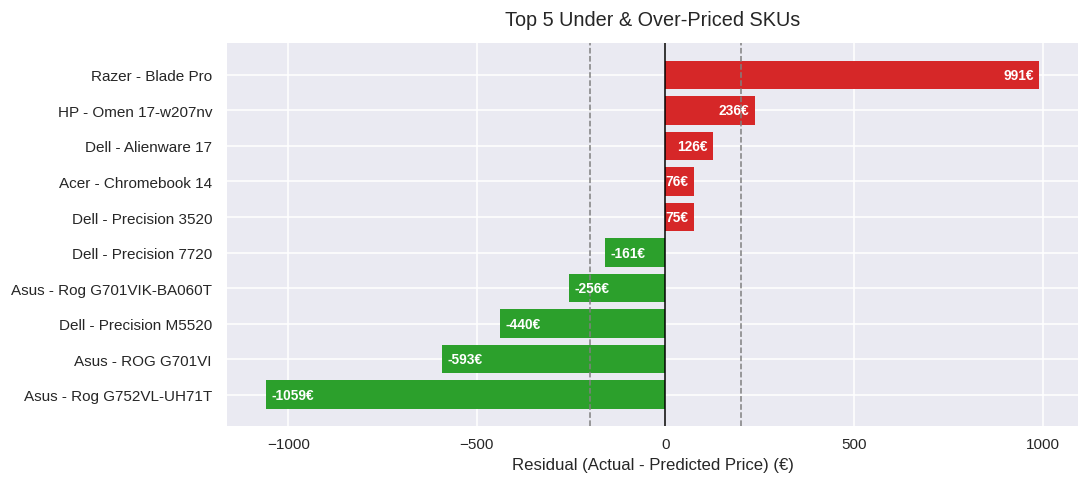

In [ ]:
# Diverging bar chart of Top 5 Under & Over‑Priced SKUs

# Selecting exactly 5 under + 5 over
under = watch_list.sort_values('Residual', ascending=True).head(5)
over  = watch_list.sort_values('Residual', ascending=False).head(5)
plot_df = pd.concat([under, over]).sort_values('Residual').reset_index(drop=True)

# Building SKU_ID from brand + product
plot_df['SKU_ID'] = plot_df['Company'] + ' - ' + plot_df['Product']


# Same plot_df (10 rows)
fig, ax = plt.subplots(figsize=(10, 4.5), dpi=110)

# Colours
colors = ['tab:green' if r < 0 else 'tab:red' for r in plot_df['Residual']]
bars = ax.barh(plot_df['SKU_ID'], plot_df['Residual'], color=colors)

# Central & threshold lines
ax.axvline(0,     color='black', linewidth=1)
ax.axvline(-200,  color='grey',  linestyle='--', linewidth=1)
ax.axvline( 200,  color='grey',  linestyle='--', linewidth=1)

# Axes & title
ax.set_xlabel('Residual (Actual - Predicted Price) (€)', fontsize=11)
ax.set_title('Top 5 Under & Over‑Priced SKUs', fontsize=13, pad=12)
ax.tick_params(axis='y', labelsize=10, pad=10)      # extra padding for names

# Annotating values inside each bar
for bar in bars:
    w  = bar.get_width()
    y  = bar.get_y() + bar.get_height()/2
    pad = 15                                   # pixels from bar end
    ax.text(w - pad if w > 0 else w + pad, y,
            f"{w:.0f}€",
            va='center',
            ha='right' if w > 0 else 'left',
            color='white', fontweight='bold', fontsize=9)

plt.tight_layout()
#plt.subplots_adjust(left=0.32)
plt.show()

In [ ]:
# Saving the tuned model
joblib.dump(best_model, 'tuned_laptop_price_model.pkl')
print("\nTuned model saved as 'tuned_laptop_price_model.pkl'.")

# Saving performance metrics
with open('tuned_model_performance.txt', 'w') as f:
    f.write(f"Tuned {best_model_type}:\n")
    f.write(f"Best Hyperparameters: {grid_search.best_params_}\n")
    f.write(f"Mean CV RMSE: {cv_rmse.mean():.2f}\n")
    f.write(f"Std CV RMSE: {cv_rmse.std():.2f}\n")
    f.write(f"Test RMSE: {rmse:.2f} Euros\n")
    f.write(f"Test MAE: {mae:.2f} Euros\n")
    f.write(f"Test R2: {r2:.2f}\n")
print("Tuned model performance metrics saved to 'tuned_model_performance.txt'.")


Tuned model saved as 'tuned_laptop_price_model.pkl'.
Tuned model performance metrics saved to 'tuned_model_performance.txt'.


In [ ]:
# Loading the engineered dataset
df = pd.read_csv('laptop_prices_engineered.csv')
print("Engineered dataset loaded successfully.")

Engineered dataset loaded successfully.


In [ ]:
# Loading the tuned model
model = joblib.load('tuned_laptop_price_model.pkl')
print("Tuned model loaded successfully.")

Tuned model loaded successfully.


In [ ]:
# Preparing features and target
if 'Log_Price_euros' in df.columns and df['Price_euros'].skew() > 1:
    target = 'Log_Price_euros'
    print("Using Log_Price_euros for interpretation.")
else:
    target = 'Price_euros'
    print("Using Price_euros for interpretation.")

X = df.drop(['Price_euros', 'Log_Price_euros'], axis=1, errors='ignore')
y = df[target]

Using Log_Price_euros for interpretation.



Top 10 Feature Importances:
Ram                       0.706203
TypeName_Notebook         0.145741
Price_per_GB              0.119167
PrimaryStorageType_HDD    0.012671
Screen_Full HD            0.005648
CPU_freq                  0.002329
SecondaryStorage          0.001475
TypeName_Gaming           0.001080
TypeName_Ultrabook        0.001005
CPU_company_Intel         0.000937
dtype: float32


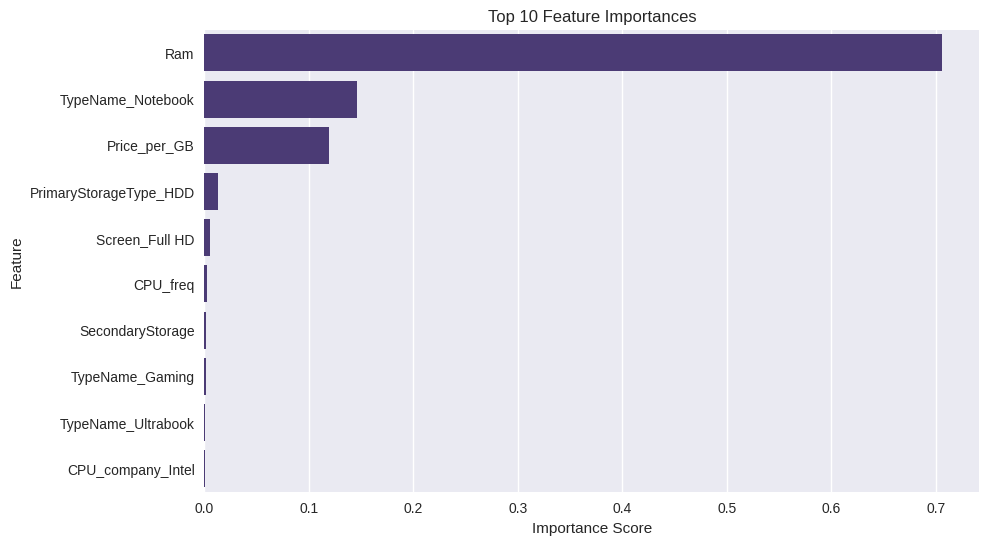

In [ ]:
# Extracting feature importance
if isinstance(model, RandomForestRegressor) or isinstance(model, xgb.XGBRegressor):
    feature_importance = pd.Series(model.feature_importances_, index=X.columns)
    feature_importance = feature_importance.sort_values(ascending=False).head(10)
    print("\nTop 10 Feature Importances:")
    print(feature_importance)

    # Visualizing feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.savefig('feature_importance.png')
    plt.show()
else:
    print("Feature importance not available for this model type.")

In [ ]:
# Analyzing prediction errors by price range

# Prediction on full dataset
y_pred = model.predict(X)
if target == 'Log_Price_euros':
    y_pred = np.expm1(y_pred)
    y_actual = np.expm1(y)
else:
    y_actual = y

# Creating price bins
price_bins = pd.qcut(df['Price_euros'], q=5, labels=['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High'])
errors = pd.DataFrame({
    'Actual': y_actual,
    'Predicted': y_pred,
    'Error': y_actual - y_pred,
    'Price_Range': price_bins
})

In [ ]:
# Summarizing errors by price range
error_summary = errors.groupby('Price_Range', observed=True)['Error'].agg(['mean', 'std']).reset_index()
print("\nPrediction Error by Price Range:")
print(error_summary)


Prediction Error by Price Range:
  Price_Range      mean        std
0         Low -0.245523   6.504872
1     Low-Mid -0.863283   7.369299
2         Mid -0.523901  10.391366
3    Mid-High -3.238936  67.471443
4        High -0.047763  83.131417


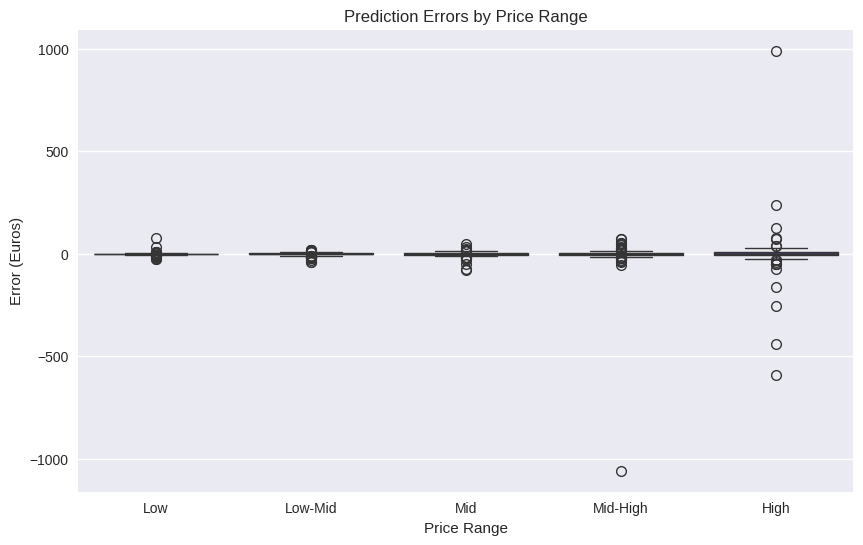

In [ ]:
# Visualizing errors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Range', y='Error', data=errors)
plt.title('Prediction Errors by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Error (Euros)')
plt.savefig('error_by_price_range.png')
plt.show()

In [ ]:
# Generating business insights
print("\nBusiness Insights:")

# Dynamically identify top features
top_features = feature_importance.nlargest(3).index.tolist()
insights = []

# Insights based on top features
for feature in top_features:
    if feature in X.select_dtypes(include=['number']).columns:
        insights.append(f"- {feature} is a key driver of price. Increasing this feature can justify higher price points for premium models.")
    elif feature.startswith('Company_'):
        brand = feature.split('_')[1]
        insights.append(f"- {brand} laptops have a strong brand premium. Emphasizing brand value in marketing can enhance perceived value.")
    else:
        insights.append(f"- {feature} significantly impacts price. We can consider how variations in this feature affect pricing strategy.")

# Enhanced error analysis
errors['MAPE'] = (errors['Error'].abs() / errors['Actual']) * 100
mape_summary = errors.groupby('Price_Range', observed=True)['MAPE'].mean().reset_index()
high_error_range = mape_summary.loc[mape_summary['MAPE'].idxmax(), 'Price_Range']
insights.append(f"- Prediction errors are relatively high in the {high_error_range} price range (MAPE: {mape_summary['MAPE'].max():.1f}%). We can consider refining features or collecting more data for this segment.")

# Model improvement recommendations
if r2 < 0.85:
    insights.append("- The model's R² is below 0.85. We can consider adding more features, such as laptop age or condition, to improve accuracy.")
if 'Company_Apple' not in feature_importance.index or feature_importance.get('Company_Apple', 0) < 0.05:
    insights.append("- Apple laptops may not be fully capturing their brand premium. We can consider adding features like 'is_premium_brand' or interactions with brand-specific attributes.")

for insight in insights:
    print(insight)


Business Insights:
- Ram is a key driver of price. Increasing this feature can justify higher price points for premium models.
- TypeName_Notebook significantly impacts price. We can consider how variations in this feature affect pricing strategy.
- Price_per_GB is a key driver of price. Increasing this feature can justify higher price points for premium models.
- Prediction errors are relatively high in the Mid-High price range (MAPE: 0.9%). We can consider refining features or collecting more data for this segment.
- Apple laptops may not be fully capturing their brand premium. We can consider adding features like 'is_premium_brand' or interactions with brand-specific attributes.


In [ ]:
# Saving interpretation results
with open('interpretation_insights.txt', 'w') as f:
    f.write("Top 10 Feature Importances:\n")
    if 'feature_importance' in locals():
        f.write(str(feature_importance) + "\n\n")
    f.write("Prediction Error by Price Range:\n")
    f.write(str(error_summary) + "\n\n")
    f.write("Business Insights:\n")
    for insight in insights:
        f.write(insight + "\n")
print("\nInterpretation results saved to 'interpretation_insights.txt'.")


Interpretation results saved to 'interpretation_insights.txt'.


In [ ]:
# Identifying numeric columns only
numeric_cols = df.select_dtypes(include=["number"]).columns

# Finding columns that have at least one negative value
neg_cols = [col for col in numeric_cols if (df[col] < 0).any()]

print("Columns with ≥1 negative value:", neg_cols)

Columns with ≥1 negative value: ['Ram', 'CPU_freq', 'SecondaryStorage', 'Price_per_GB', 'Storage_Weight']
